In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
import os 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)



In [48]:
baseurl= r"C:\Users\Benwari Ezekiel\Documents\code\archive"
file = 'Mall_Customers.csv' 
filepath = os.path.join(baseurl,file)
df = pd.read_csv(filepath)


In [49]:
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
newDf = df[['Spending Score (1-100)','Annual Income (k$)']]
x = df['Spending Score (1-100)']
y = df['Annual Income (k$)']
print(newDf)
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(newDf)
    wcss.append(kmeans.inertia_)




     Spending Score (1-100)  Annual Income (k$)
0                        39                  15
1                        81                  15
2                         6                  16
3                        77                  16
4                        40                  17
..                      ...                 ...
195                      79                 120
196                      28                 126
197                      74                 126
198                      18                 137
199                      83                 137

[200 rows x 2 columns]


C:\Users\Benwari Ezekiel\AppData\Local\Temp\ipykernel_15248\984575460.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Spending Score (1-100)', y="Annual Income (k$)",data=newDf,palette='coolwarm')


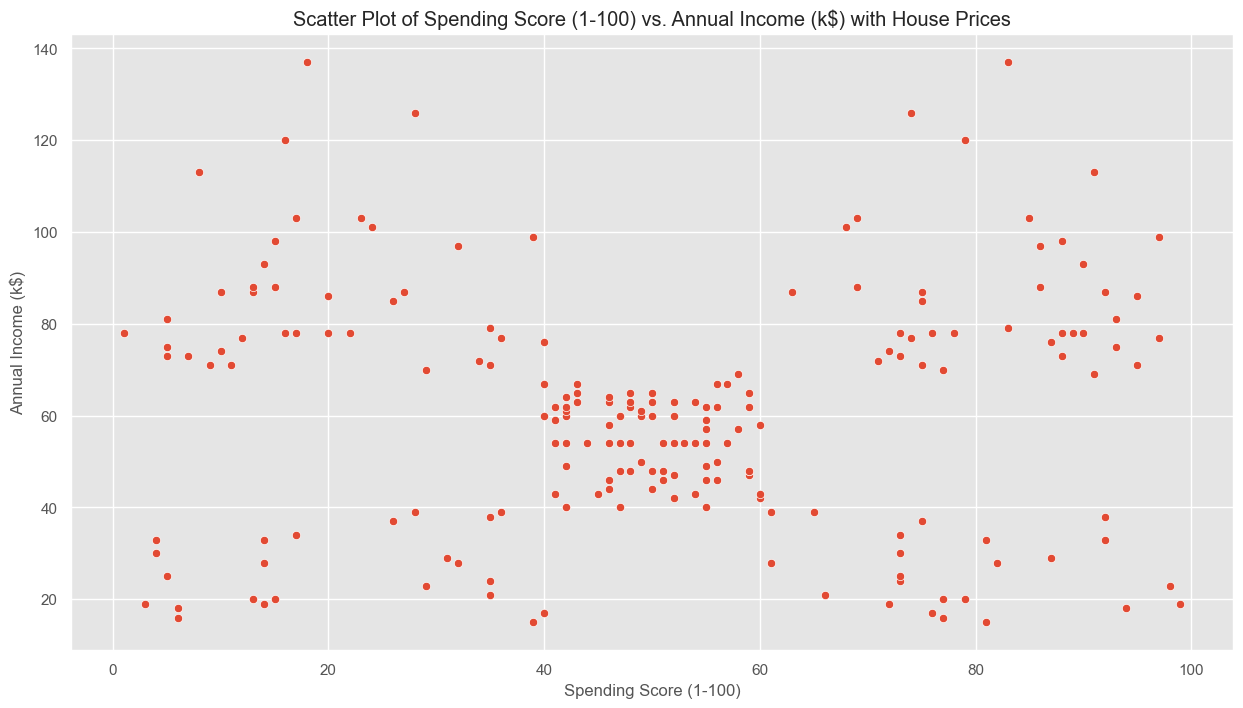

(array([[25., 19., 23., 55., 22., 29., 23.,  4.,  0.,  0.],
        [ 0., 28., 22., 36., 36., 42., 16., 12.,  4.,  4.]]),
 array([  1. ,  14.6,  28.2,  41.8,  55.4,  69. ,  82.6,  96.2, 109.8,
        123.4, 137. ]),
 <a list of 2 BarContainer objects>)

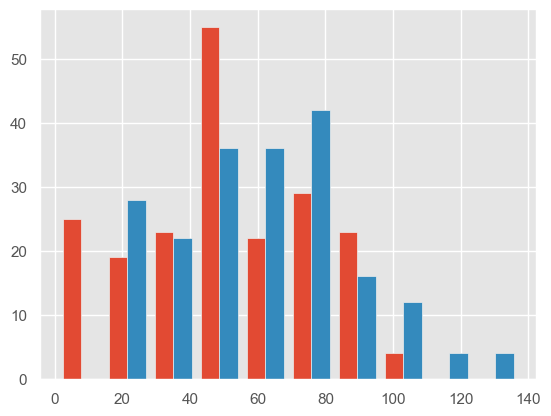

In [53]:
plt.figure(figsize =(15,8))
sns.scatterplot(x='Spending Score (1-100)', y="Annual Income (k$)",data=newDf,palette='coolwarm')
plt.title('Scatter Plot of Spending Score (1-100) vs. Annual Income (k$) with House Prices')
plt.show()
plt.hist(newDf)


Text(0, 0.5, 'wscc score')

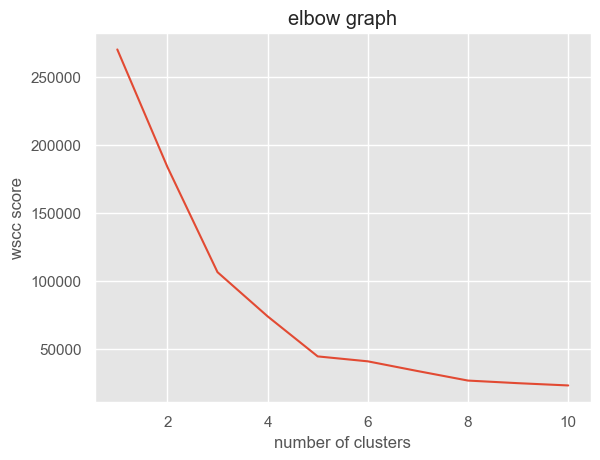

In [54]:

plt.plot(range(1,11),wcss)
plt.title('elbow graph')
plt.xlabel('number of clusters')
plt.ylabel('wscc score')

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 6 4 3 4 3 4 3 4 3 4
 3 4 3 6 3 6 6 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 5 2 5 0 5 2 5 2 5 0 5 2 5 2 5 2 5 2 5 0 5 2 5 0 5
 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 1 7 1 7 1 7
 1 7 1 7 1 7 1 7 1 7 1 7 1 7 1]


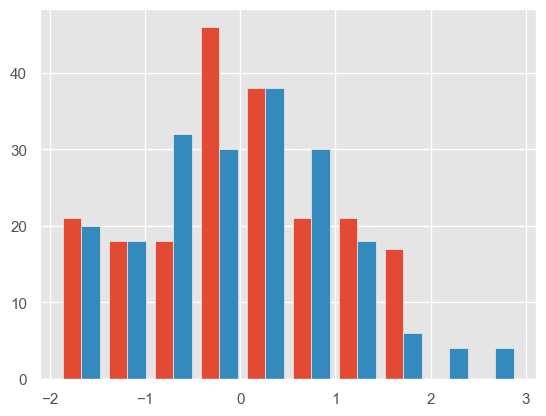

In [62]:
cluster_size = 8
scaler = StandardScaler()
scaledDF= scaler.fit_transform(newDf)
plt.hist(scaledDF)
kmeans2 = KMeans(n_clusters=8,init='k-means++',random_state=42)
kmeans2.fit(scaledDF)
y = kmeans2.fit_predict(scaledDF)
print(y)




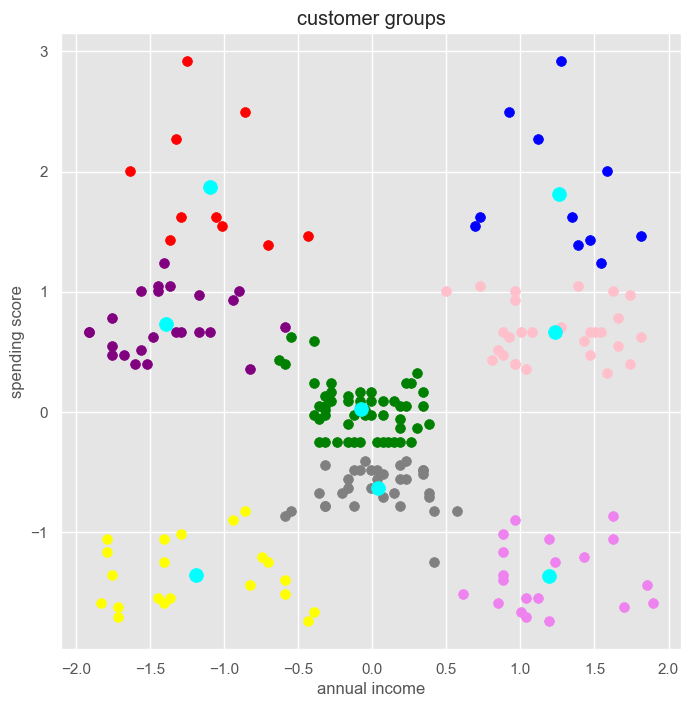

In [65]:
plt.figure(figsize=(8,8))
plt.scatter(scaledDF[y==0,0],scaledDF[y==0,1],s=50, c='green',label='cluster 1')
plt.scatter(scaledDF[y==1,0],scaledDF[y==1,1],s=50, c='blue',label='cluster 2')
plt.scatter(scaledDF[y==2,0],scaledDF[y==2,1],s=50, c='purple',label='cluster 3')
plt.scatter(scaledDF[y==3,0],scaledDF[y==3,1],s=50, c='violet',label='cluster 4')
plt.scatter(scaledDF[y==4,0],scaledDF[y==4,1],s=50, c='yellow',label='cluster 5')
plt.scatter(scaledDF[y==5,0],scaledDF[y==5,1],s=50, c='pink',label='cluster 6')
plt.scatter(scaledDF[y==6,0],scaledDF[y==6,1],s=50, c='grey',label='cluster 7')
plt.scatter(scaledDF[y==7,0],scaledDF[y==7,1],s=50, c='red',label='cluster 8')
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],s=100,c='cyan',label='centroids')
plt.title('customer groups')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()

In [ ]:
def predict():
    x1 = int(input("enter your spending score"))
    x1scaled = scaler.fit_transform(x1)
    y1 = kmeans2.fit_predict(x1scaled)
    print(f'your group is {y1}')
    return